<a href="https://colab.research.google.com/github/Lucky456F/Tamizan-Skills-Internship-ML-AI-PROJECT-7/blob/main/Project_7_Emotion_Detection_from_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
data = {
    'text': [
        "I'm so happy with my results!",
        "This is the worst day ever.",
        "I feel really sad and alone.",
        "Wow, that's amazing news!",
        "Why did you do that? I'm angry.",
        "I can't believe how excited I am!",
        "I'm so frustrated with this homework.",
        "Thank you, I feel grateful.",
        "I'm scared about the exam tomorrow.",
        "This makes me laugh so much!"
    ],
    'emotion': [
        "happy", "sad", "sad", "happy", "angry", "happy", "angry", "happy", "fear", "happy"
    ]
}
df = pd.DataFrame(data)

In [ ]:
X = df['text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = clf.predict(X_test_vec)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        fear       0.00      0.00      0.00       1.0
       happy       0.00      0.00      0.00       0.0
         sad       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

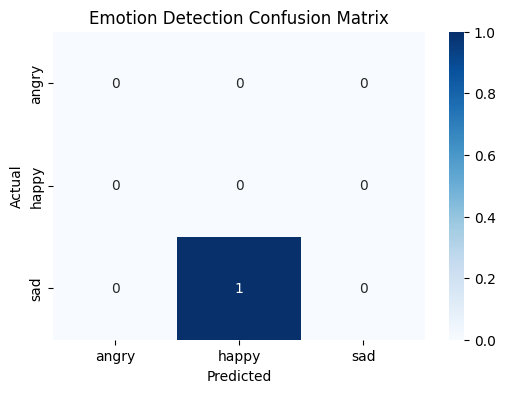

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Emotion Detection Confusion Matrix')
plt.show()

In [ ]:
examples = [
    "I'm feeling nervous about my interview.",
    "You made my day, thank you!",
    "This is so annoying and unfair.",
    "I'm absolutely thrilled with my progress!"
]
examples_vec = vectorizer.transform(examples)
predictions = clf.predict(examples_vec)
for msg, emotion in zip(examples, predictions):
    print(f"Text: '{msg}' --> Detected Emotion: {emotion}")


Text: 'I'm feeling nervous about my interview.' --> Detected Emotion: happy
Text: 'You made my day, thank you!' --> Detected Emotion: happy
Text: 'This is so annoying and unfair.' --> Detected Emotion: happy
Text: 'I'm absolutely thrilled with my progress!' --> Detected Emotion: happy
